## SVM & Naive bayes

Theoretical

1. What is a Support Vector Machine (SVM) ?
  - Support Vector Machine is a supervised machine learning algorithm used for classification and regression tasks.
  - SVM(support vactor machine) tries to find the best boundary(hyperplan) that separates data points of different classes with the maximum margin.
  - It draws a line in(2D) or plane(in higher dimensions) that separates data points of different classes with the maximum margin.

2. What is the difference between Hard Margin and Soft Margin SVM ?
  - Both are types of support vector machine(SVM) margins that controls how strictly the model separates data.
  - Hard Margins SVM
    - Hard margin SVM tries to find a boundary that perfectly separates the data with no misclassification alllowed.
    - All data points must satisfy.
    - Data must be 100% linearly separable.
    - No noise or overlap allowed.
    - Points are clearly separated by a straight line with a large gap.
  - Soft Margins SVM
    - Soft margin allows some misclassification to handle noisy and overlapping data.
    - It interduces a penalty parameter C.
    - Condotion : =slack variable (error allowance).
    - Allows few wrong classification.
    - Works with real-world noisy datasets.
    - Handles noise and outliers.
    - More flexible and practical.


3. What is the mathematical intuition behind SVM  ?
  - The mathematical intuition behind Support Vector Machines (SVM) is beautifully grounded in geometry and optimization. Fundamentally, SVM isn't just about drawing a line between two classes; it's about finding the absolute best line by framing it as a mathematical maximization problem.
  - Here is the step-by-step breakdown of the math that makes SVM work:
  - 1. The Equation of the Hyperplane
    - In any n-dimensional space, a hyperplane (the decision boundary) can be defined by the equation:$$w \cdot x + b = 0$$
    - $x$ is your input data vector.
    - $w$ is the weight vector, which is strictly perpendicular (normal) to the hyperplane. It determines the orientation of the plane.
    - $b$ is the bias, which shifts the hyperplane away from the origin.
  - 2. Defining the Margins
    - To make the model robust, we don't just want a single line; we want a buffer zone (the margin). We imagine two parallel hyperplanes pushing out from the center boundary until they "bump" into the closest data points from each class. These closest points are your Support Vectors.
    - We mathematically define these two boundary lines as:
      - Positive class boundary: $w \cdot x + b = 1$
      - Negative class boundary: $w \cdot x + b = -1$
    - For a model to classify correctly without errors, every positive data point ($y_i = 1$) must sit on or beyond the positive boundary, and every negative data point ($y_i = -1$) must sit on or beyond the negative boundary. We can combine this into a single, elegant mathematical constraint:$$y_i (w \cdot x_i + b) \ge 1$$
  - 3. Maximizing the Margin Distance
    - Using basic vector geometry, the distance between those two outer boundaries is exactly:$$\frac{2}{||w||}$$
    - where $||w||$ is the magnitude (length) of the weight vector.
    - To get the most robust model, we need to make this margin as wide as possible. Mathematically, to maximize $\frac{2}{||w||}$, we need to minimize $||w||$.
  - 4. The Core Optimization Problem (Hard Margin)
    - To make the calculus easier (specifically, finding derivatives), we minimize the squared norm instead of the raw magnitude, and multiply it by $\frac{1}{2}$. This gives us the foundational SVM optimization problem:$$\min_{w,b} \frac{1}{2} ||w||^2$$
    - Subject to the constraint:$$y_i(w \cdot x_i + b) \ge 1$$This is a convex optimization problem, meaning it has one single, global minimum. This is why an SVM won't get stuck in a "local" minimum like a neural network might!.
  - 5. Handling Real-World Data (Soft Margin)
    - In reality, data overlaps and isn't perfectly separable. To handle this, we introduce a "slack variable," represented by $\xi_i$ (xi), which measures how far a point is on the wrong side of the margin.
    - The new optimization goal becomes:$$\min_{w,b} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i$$  
    - This formula perfectly explains the $C$ parameter tradeoff from your recent quiz:
    - The $\frac{1}{2} ||w||^2$ part is trying to maximize the margin.
    - The $C \sum \xi_i$ part is a penalty trying to minimize misclassifications.
    - By adjusting $C$, you tell the math which side of the equation to care about more.    



4. What is the role of Lagrange Multipliers in SVM ?
  - Lagrange Multipliers are the mathematical "secret sauce" that makes Support Vector Machines so incredibly powerful. They take the constrained optimization problem we just looked at and flip it into a format that unlocks the two biggest superpowers of SVM: identifying the actual support vectors and enabling the Kernel Trick.
  - Here is the breakdown of exactly what Lagrange Multipliers do in this context:
  - 1. The Problem With Constraints
    - In traditional calculus, if you want to find the minimum of a function, you just take the derivative and set it to zero. But as we saw, SVM has a strict rule (a constraint): every data point must be on the correct side of the margin:
    - $y_i(w \cdot x_i + b) \ge 1$
    - You cannot just take a standard derivative when you have an inequality constraint blocking your path.
  - 2. The Lagrange Multiplier Bridge  
    - Lagrange Multipliers ($\alpha$) act as a mathematical bridge. They allow us to take that strict constraint and "bake" it directly into the main objective function as a penalty.
    - We introduce a multiplier $\alpha_i$ for every single data point in our training set. The new function, called the Lagrangian, looks like this
    - $$L(w, b, \alpha) = \frac{1}{2} ||w||^2 - \sum_{i=1}^{n} \alpha_i [y_i(w \cdot x_i + b) - 1]$$
    - Now, instead of minimizing one thing while worrying about a separate rule, we just have to optimize this one combined equation. We want to minimize it with respect to $w$ and $b$, while maximizing it with respect to $\alpha_i$
  - 3. The "Aha!" Moment: Discovering Support Vectors
    - When the algorithm solves this Lagrangian equation, something beautiful happens. For the vast majority of your data points, the math will decide that the best way to optimize the equation is to set their Lagrange multiplier to exactly zero ($\alpha_i = 0$).
    - The only data points that end up with a value greater than zero ($\alpha_i > 0$) are the ones sitting exactly on the margin boundaries, or violating them.
      - These specific points with $\alpha_i > 0$ are your Support Vectors.
      - This perfectly explains why your quiz stated that support vectors "define the decision boundary." The model literally ignores every training data point where $\alpha_i = 0$ when making future predictions!
  - 4. Unlocking the Dual Problem and Dot Products
    - By using Lagrange Multipliers and taking the partial derivatives with respect to $w$ and $b$ (and setting them to zero), we can substitute $w$ and $b$ entirely out of the equation.This transforms our original (Primal) problem into what is known as the Dual Formulation:$$\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)$$Notice the very end of that equation: $(x_i \cdot x_j)$.
    - The entire SVM algorithm now relies only on the dot product between pairs of input data points. This is exactly where the Kernel Trick (from your earlier quiz questions) comes in. Because the math only needs dot products, we can swap out that simple $(x_i \cdot x_j)$ for a complex function like the RBF Kernel to map data into infinite dimensions without actually doing the heavy computational lifting.          

5. What are Support Vectors in SVM ?
  - Support vectors are the data points closest to the decision boundary(hyperplane) in a Support Vector Machine. They are the most critical points that determine the position and orientation of the boundary.
  - Imagine two classes of points. Many possible separating lines exist, but SVM chooses the one with maximum margin.
  - The points that lie on the margin edges(closest to the boundary) are called support vectors.  

6.  What is a Support Vector Classifier (SVC) ?
  - A Support Vector Classifier is a type of support vector Machine used specifically for classification taks. It finds the optimal hyperplane that separates classes while maximizing the margin between them.
  - A Support Vector Classifier is an SVM model used to classify data by creating a maximum-margin decision boundary using support vectors.
  - Key idea :      
    - It uses only the support vectors(closet points to the boundary) to determine the classification  boundary.
    - So prediction depends mainly on these critical points, not all training data.

7. What is a Support Vector Regressor(SVR) ?
  - A Support Vector Regressor(SVR) is the regression version of support vector machine(SVM). It is used to predict continous numerical value instead of class labels.
  - SVR is an SVM-based algorithm that fits a function within a specified error margin($\epsilon$) while keeping the model as flat(simple) as possible.
  - Core Idea(Intuition)
    - Unlike classification (separating classes), SVR tries to find a function that :       
      - Predicts value close to actual targets.
      - Allows samll errors within a tolerance range($\epsilon$).
      - Uses only critical data points (support vectors).
    - It doesn't try to minimize every error, only those outside the $\epsilon$-tube.    

8. What is the Kernel Trick in SVM ?
  - The Kernel trick is a technique in SVM that allows us to solve non-linearly separable problems by implicitly mapping data into a higher-dimensional feature space without actually computing the transformation.
  - Why Kernel is needed ?
    - In many real datasets, classes are not linearliy separable in original space.
    - Example : Points may form circular or complex patterns -->> no straight line can separate them .
    - Solution : Transform data into a higher-dimensional space where it becomes linearly separable.
    - But explicitly computing this transformation can be very expensive
    - That's why the kernel trick comes in.

9.  Compare Linear Kernel, Polynomial Kernel, and RBF Kernel ?
 - Linear Kernel:      
   - Formula
     -  $K(x_i, x_j) = x_i \cdot x_j$ (Just a standard dot product).
   - Intuition:
     - no transformation of features.
     - Works when data is linearly separable.
   - Decision Boundary:
     - Straight line(or hyperplane)
   - When to Use
     - High-dimensional data(e.g., text classificarion, NLP)
     - When relationship is mostly linear.
   - Limitation:
     - Cannot capture complex non-linear patterns
  - Polynomial Kernel:
    - Formula
      - $$K(x_i, x_j) = (\gamma (x_i \cdot x_j) + r)^d$$$d$ is the degree of the polynomial (e.g., $d=2$ for a quadratic curve, $d=3$ for cubic).
    - Intuition:
      - Maps data into higher-dimensional polynomial feature space
      - Captures interactions between features
    - Decision Boundary:
      - Curved boundary (depends on degree)
    - When to use:
      - When data has polynomial relatioship
      - Moderate complexity patterns
    - Limitation:
      - High degree -->> risk of overfitting
      - Computationally heavier than linear   
  - RBF Kernel (Gaussian Kernel)
    - Formula:
      - $$K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$$
    - Intuition:
      - Maps data into infinite-dimensional space
      - Measures similarity based on distance
    - Decision Boundary:
      - Highly flexible, very complex non-linear shapes
    - When to use:
      - Complex, non-linear datasets
      - Default choice when unsure                         

10. What is the effect of the C parameter in SVM ?
  - The C parameter in SVM is a regularization hyperparameter that controls the trade-off between:
    - Maximizing the margin
    - Minimizing classification/regression error
  - It decides how much the model should penalize misclassified points.  
    - The $C$ parameter tells the math which of these two goals is more important. Recall the optimization formula:$$\min_{w,b} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i$$
     

11. What is the role of the Gamma parameter in RBF Kernel SVM ?
  - The Gamma parameter ($\gamma$) is specific to non-linear SVMs, most notably the RBF (Radial Basis Function) kernel. While the $C$ parameter controls how strictly the model punishes errors, Gamma controls the actual shape and smoothness of the decision boundary.
  - To understand it, let's look at the mathematical formula for the RBF kernel:$$K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$$
  - In this equation, Gamma defines the reach of influence of a single training point. It dictates how far a single data point's "gravitational pull" extends across the dataset.
  - In RBF Kernel SVM, gamma controls the influence of individual training points: high gamma creates complex, localized decision boundaris (risk of overfitting), while low gamma produces smoother, more generalizednboundaries (risk of underfitting).

 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
   - Naive Bayes is a supervised machine learning algorithm based on Bayes' Theorem, used for classification tasks such as spam detection, sentiment analysis, and text categorization.
   - It predicts the class with the highest posterior probability.
   - Why is it called "Naive" ?
     - The algorithm earns the title "naïve" because it makes a very strong, simplifying assumption: it assumes that all the features in a dataset are conditionally independent of each other, given the class label.
     - This means the algorithm operates under the strict belief that the presence or value of one feature does not affect the presence or value of another.
   - A Real World Example of thr "Naive" Assumption:
     - Imagine you are building a model to classify whether a piece of fruit is an apple. The features might include being red, round, and about 4 inches in diameter.
    - In reality, these features are not completely independent; a fruit's size and color often change together as it grows and ripens.
    - However, a Naïve Bayes classifier completely ignores these real-world correlations. It considers the "redness," the "roundness," and the "diameter" to each independently contribute to the final probability that the fruit is an apple.

13. What is Bayes’ Theorem ?
  - Bayes’ Theorem is a fundamental mathematical formula in probability and statistics. It calculates the conditional probability of an event—meaning it helps us determine the probability of an event happening based on prior knowledge of conditions that might be related to the event.
  - In simple terms, Bayes' Theorem is a way to update our existing beliefs based on new evidence.
  - The Formula:
    - The theorem is expressed through this famous equation:$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$
  - Bayes's theorem is a probability rule that calculates the posterior probaility of a hypothesis given observed evidence by combining prior belief and likelihood of the evidence.   

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
  - The primary difference between Gaussian, Multinomial, and Bernoulli Naïve Bayes lies entirely in the shape of the data they are designed to handle. While they all use the exact same foundational Bayes' Theorem, they make different mathematical assumptions about how your features (the input data) are distributed.
  - Gaussian Naïve Bayes (For Continuous Data)
    - This variant is used when your features are continuous numerical values (like height, weight, salary, or temperature) rather than discrete categories.
    - The Assumption: It assumes that the continuous values associated with each class are distributed according to a normal (Gaussian) distribution (the classic "bell curve").
    - How It Works:
      - Instead of counting frequencies, the algorithm calculates the mean ($\mu$) and variance ($\sigma^2$) of the features for each class. It then plugs those into the Gaussian probability density function to estimate the likelihood:$$\displaystyle P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)$$
    - Best Used For:
      - Standard tabular data with numerical features, like predicting whether someone will default on a loan based on their exact income and credit score.
  - Multinomial Naïve Bayes (For Count/Frequency Data)
    - This is the go-to algorithm for text classification and Natural Language Processing (NLP). It is designed to handle discrete data that represents frequencies or counts.

    - The Assumption:
      - It assumes the features are generated from a multinomial distribution, which models the probability of observing a specific sequence of counts.
    - How It Works:
      - If you are analyzing a document, the features are the vocabulary words, and the values are how many times each word appears (often processed using CountVectorizer). The algorithm calculates probabilities based on these raw frequencies.
    - Best Used For:
      - Spam filtering, sentiment analysis, or topic categorization where the number of times a word appears matters (e.g., seeing the word "sale" 5 times is stronger evidence of spam than seeing it 1 time).
  - Bernoulli Naïve Bayes (For Binary/Boolean Data)
    - Like Multinomial, this is heavily used in text classification, but it dramatically simplifies how it views the data. It only cares about whether a feature is present or absent, completely ignoring frequency.
    - The Assumption:
      - It assumes all features are binary variables (0s and 1s, True or False).
    - How It Works:
      - In text analysis, it looks at a document and simply asks: Did the word "winner" appear? Yes (1) or No (0). It does not care if the word appeared once or fifty times. It also explicitly penalizes the non-occurrence of a feature, which Multinomial does not do in the same way.
    - Best Used For:
      - Short text classification (like tweets or headlines) where word repetition is rare, or analyzing binary survey data (e.g., yes/no questionnaires).       

15. When should you use Gaussian Naïve Bayes over other variants ?
  - We should use Gaussian Naive Bayes when your features are continous numerical values that are approximately normally(Gaussian) distributed.
  - Your Features are Continuous (Real Numbers)
    - If your data involves measurements like height, weight, salary, temperature, or financial metrics, Gaussian Naïve Bayes is the correct choice.

    - Unlike Multinomial, which expects integer counts (like "how many times did this word appear?"), Gaussian expects real-world numbers with decimals.

    - Unlike Bernoulli, which expects simple 1s and 0s (True/False), Gaussian handles infinite possibilities along a number line.

  - Real-World Example:
    - If you are building a model to predict whether a cryptocurrency's price will go up or down based on continuous technical indicators—like 24-hour trading volume, moving averages, or RSI—Gaussian Naïve Bayes is an excellent baseline model to use.
  - Your Data Follows a "Bell Curve"
    - The algorithm mathematically assumes that the continuous values for each class are distributed normally (forming a Gaussian or "bell curve" shape).
      - If you plot your feature data on a histogram and it looks roughly like a symmetrical bell, this algorithm will perform exceptionally well.  

16. What are the key assumptions made by Naïve Bayes ?
  - The Naïve Bayes classifier relies on a few core mathematical assumptions to make its probability calculations fast and efficient. While these assumptions are rarely perfectly true in the real world, the model still manages to perform exceptionally well in many practical applications.
  - Conditional Independence (The "Naïve" Assumption)
    - This is the most critical assumption and the reason the algorithm is called "naïve." It assumes that every feature in your dataset is completely independent of every other feature, given the class label.
    - Mathematically, it assumes that the joint probability of all your features ($x_1, x_2, ..., x_n$) given a class ($y$) is simply the product of their individual probabilities:$$P(x_1, x_2, ..., x_n | y) = \prod_{i=1}^{n} P(x_i | y)$$
    - In plain terms:
      - It believes that knowing the value of one feature gives you absolutely zero information about the value of any other feature.
    - The reality:
      - Features are often highly correlated (e.g., in a weather dataset, "humidity" and "chance of rain" are clearly linked, but Naïve Bayes treats them as completely separate pieces of evidence).
  - Equal Feature Importance
    - Naïve Bayes assumes that all features contribute equally to the final prediction.
    - In plain terms:
      - The algorithm does not inherently weight one feature as "more important" than another before looking at the data. It treats the presence of the word "urgent" in an email with the exact same baseline mathematical weight as the word "the", relying entirely on the calculated probability scores to differentiate them.
    - The reality:
      - In most datasets, a handful of features are strong predictors, while others are just noise.
  - Distribution Assumptions (Variant-Specific)
    - Depending on which version of Naïve Bayes you use, the algorithm makes a strict assumption about the shape of your data:
    - Gaussian Naïve Bayes:
      - Assumes continuous data is perfectly normally distributed (follows a symmetric bell curve).
    - Multinomial Naïve Bayes:
      - Assumes discrete data represents counts or frequencies (like how many times a word appears).
    - Bernoulli Naïve Bayes:
      - Assumes all features are strictly binary (0 or 1, True or False).      

17. What are the advantages and disadvantages of Naïve Bayes ?
  - Advanteages of Naive Bayes
    - Extremely Fast and Efficient:
      - Because it simply calculates probabilities using basic math, it is incredibly fast to train and makes real-time predictions much faster than heavy algorithms like SVMs or Neural Networks.
    - Handles High-Dimensional Data:
      - It thrives in datasets with thousands of features (like text classification, where every word is a feature). It doesn't get bogged down by the "curse of dimensionality."
    - Works Well with Small Datasets:
      - Unlike deep learning models that need massive amounts of data, Naïve Bayes can generate reliable probability estimates from relatively small training sets.
    - Ignores Irrelevant Features:
      - If a feature has no actual correlation to the class, its probability distribution will be essentially equal across all classes, meaning the math naturally cancels it out without ruining the prediction.
    - Multi-Class Prediction:
      - It naturally extends to multi-class classification problems (predicting more than two outcomes) without needing complex workarounds.
  - Disadvantagees of Naive Bayes
    - The "Naïve" Assumption is Rarely True: In the real world, features are almost always correlated (e.g., in a housing dataset, "number of bedrooms" and "square footage" are highly linked). Treating them as completely independent can hurt the model's accuracy on complex datasets.
    - The Zero Probability Problem:
      - If your test data contains a categorical feature value that the model never saw during training, the algorithm assigns it a probability of absolute zero. Because it multiplies all probabilities together, this single zero wipes out the entire equation.
    - Bad Estimator:
      - While Naïve Bayes is a very good classifier (it puts things in the correct bucket), the actual probability scores it outputs (like saying there is a 99.9% chance an email is spam) are notoriously overconfident and unreliable. You shouldn't use its raw probability scores for strict decision-making.
    - Continuous Data Struggles:
      - While Gaussian Naïve Bayes handles continuous numbers, it forces them into a rigid "bell curve" assumption. If your numerical data doesn't naturally look like a bell curve, the model's performance drops significantly.      

18. Why is Naïve Bayes a good choice for text classification ?
  - Naïve Bayes is arguably the most famous baseline algorithm for text classification tasks, such as spam detection, sentiment analysis, and topic categorization. Even with the rise of deep learning, it remains a staple in Natural Language Processing (NLP).
  - Here is exactly why it is such a perfect fit for text data:
    - It Excels in High-Dimensional Spaces
      - When you convert text into data that a machine can read (using techniques like Bag-of-Words or TF-IDF), every single unique word in your entire dataset becomes its own distinct feature. If your dataset has a vocabulary of 50,000 words, you suddenly have 50,000 features.
      - Many heavy algorithms struggle, slow down, or overfit when faced with this "curse of dimensionality."
      - Naïve Bayes thrives here. Because it treats every feature (word) independently, it easily scales to handle tens of thousands of dimensions without a massive drop in performance.
  - It is Computationally Lightning Fast
    - Training a Naïve Bayes model on text essentially just involves counting how many times words appear in each class and dividing by the total.
      - There are no complex iterative optimization equations (like you saw with SVMs or neural networks).
      - It requires only a single pass over the training data, making it incredibly fast to train and even faster at predicting the class of a new document in real-time.
  - The "Naïve" Assumption Actually Prevents Overfitting
    - We know that the core assumption of Naïve Bayes—that words are completely independent of each other—is mathematically false (e.g., the word "New" is highly likely to be followed by "York").
    - However, in text classification, treating words independently acts as a natural form of regularization. It stops the model from memorizing highly specific, exact phrases from the training data, allowing it to generalize better when it sees completely new sentences in the testing data.
  - It Handles "Sparse" Data Perfectly
    - In a 50,000-word vocabulary, a single email or movie review might only contain 100 unique words. This means the other 49,900 feature columns for that specific document will just be zeros. This is called a "sparse matrix."
    - Because Naïve Bayes just multiplies probabilities, it naturally handles these empty features without wasting computational memory, especially when paired with Laplace Smoothing to prevent zero-probability errors.
  - Purpose-Built Variants
    - As we covered earlier, algorithms like Multinomial Naïve Bayes and Bernoulli Naïve Bayes are practically custom-built for text. They are specifically designed to ingest word counts and binary word presence, making the data pipeline highly intuitive.   

19. Compare SVM and Naïve Bayes for classification tasks ?
  - Comparing Support Vector Machines (SVM) and Naïve Bayes is a great way to understand the two main schools of thought in machine learning classification: the geometric approach and the probabilistic approach.
  - Core Philosophy (How They Think)
    - SVM is Geometric:
      - It plots your data points in space and tries to draw the widest possible physical boundary (a hyperplane) between different classes. It only cares about the data points closest to the boundary (the Support Vectors).
    - Naïve Bayes is Probabilistic:
      - It doesn't draw lines. Instead, it uses Bayes' Theorem to calculate the mathematical odds of a data point belonging to a certain class based on prior evidence.
  - Feature Relationships
    - SVM is Complex to Tune:
      - To get a good SVM model, you have to experiment with multiple hyperparameters: choosing the right Kernel (Linear, RBF, Polynomial), finding the optimal $C$ value, and tuning $\gamma$ (Gamma).
    - Naïve Bayes works "Out of the Box":
       - There is almost nothing to tune. Aside from occasionally adjusting the Laplace Smoothing parameter ($\alpha$), a Naïve Bayes model gives you its best result almost immediately
  - Speed and Scalability
    - Naïve Bayes is Lightning Fast:
      - Because it only requires counting frequencies and basic multiplication, it trains almost instantly and requires very little memory. It scales effortlessly to massive datasets with millions of rows.
    - SVM is Computationally Heavy:
      - Solving the optimization equations and calculating margin distances requires serious processing power. Training an SVM on a dataset with hundreds of thousands of rows (especially with a non-linear RBF kernel) can be incredibly slow.
  - Tuning and Complexity
    - SVM is Complex to Tune:
      - To get a good SVM model, you have to experiment with multiple hyperparameters: choosing the right Kernel (Linear, RBF, Polynomial), finding the optimal $C$ value, and tuning $\gamma$ (Gamma).
    - Naïve Bayes works "Out of the Box":
        - There is almost nothing to tune. Aside from occasionally adjusting the Laplace Smoothing parameter ($\alpha$), a Naïve Bayes model gives you its best result almost immediately.   

20. How does Laplace Smoothing help in Naïve Bayes ?
  - Laplace Smoothing is a critical mathematical technique used in Naïve Bayes to solve one of the algorithm's biggest vulnerabilities: the Zero Probability Problem.
  - Here is a straightforward breakdown of why this problem happens and exactly how Laplace Smoothing fixes it.
  - The Problem: The "Zero Frequency" Error
    - Because Naïve Bayes calculates the final probability of a class by multiplying the individual probabilities of every feature together, it is highly sensitive to the number zero.
    - Imagine you are building a spam filter, and your model encounters the word "cryptocurrency" in a test email.
      - If the word "cryptocurrency" never appeared in any of the Spam emails during training, the model calculates the probability of that word given the Spam class as exactly 0.
      - Because Naïve Bayes multiplies everything together ($P(w_1) \cdot P(w_2) \cdot P(\text{cryptocurrency}) \cdot ...$), that single zero acts like a black hole. It wipes out the entire calculation, resulting in an absolute 0% chance that the email is spam, completely ignoring all the other highly suspicious words in the email.
  - The Solution: Laplace Smoothing
    - Laplace Smoothing (also known as Add-One Smoothing) fixes this by ensuring that a probability of exactly zero is mathematically impossible.
    - It does this by pretending it has seen every possible feature (like every word in your vocabulary) at least one extra time. By adding a small baseline value to the counts of every feature, it gives unseen features a tiny, non-zero probability instead of an absolute zero.
  - The Mathematical Formula
    - To understand how it works, let's look at how the probability of a word given a class, $P(w|c)$, changes.Without Smoothing:$$P(w|c) = \frac{\text{Count}(w, c)}{\text{Total words in class } c}$$
    - (If the count is 0, the whole fraction is 0).
    - With Laplace Smoothing:
      - $$P(w|c) = \frac{\text{Count}(w, c) + \alpha}{\text{Total words in class } c + \alpha \cdot |V|}
      - $$$\alpha$ (Alpha): This is the smoothing parameter. In standard Laplace Smoothing, $\alpha = 1$. This adds 1 to the numerator, guaranteeing it can never be zero.
      - $|V|$ (Vocabulary Size): To keep the math balanced so that all probabilities still add up to 100% (or 1.0), we must add the total number of unique features ($|V|$) multiplied by $\alpha$ to the denominator.
  - The Impact on the Model  
    - Prevents Vetoes:
      - It stops a single unseen feature from "vetoing" the entire prediction.
    - Regularization:
      - It acts as a mild form of regularization. By slightly lowering the probabilities of very frequent words and slightly raising the probabilities of rare/unseen words, it prevents the model from becoming overly confident in its training data.    

Practical

In [1]:
# 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data   # The features (sepal length, sepal width, petal length, petal width)
y = iris.target # The labels (Setosa, Versicolor, Virginica)

# 2. Split the dataset into training and testing sets
# We use 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the SVM Classifier
# We are using a linear kernel here, which works well for the Iris dataset
svm_classifier = SVC(kernel='linear', random_state=42)

# 4. Train the model using the training data
svm_classifier.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# 6. Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [2]:
# 22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies ?
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 2. Split the dataset into training and testing sets
# We use 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the features
# Feature scaling is highly recommended for SVMs to prevent features with wider
# ranges from dominating the distance calculations.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize the SVM Classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# 5. Train both models using the scaled training data
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

# 6. Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# 7. Evaluate and compare the accuracies
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"SVM with Linear Kernel Accuracy: {acc_linear * 100:.2f}%")
print(f"SVM with RBF Kernel Accuracy:    {acc_rbf * 100:.2f}%")


SVM with Linear Kernel Accuracy: 98.15%
SVM with RBF Kernel Accuracy:    98.15%


In [3]:
# 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE):
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 1. Load the California Housing dataset
# Note: The older Boston housing dataset was removed from scikit-learn,
# so California Housing is the standard replacement.
housing = fetch_california_housing()
X = housing.data   # Features (e.g., median income, house age, number of rooms)
y = housing.target # Target (Median house value in 100,000s)

# 2. Split the dataset into training and testing sets
# Using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
# SVR is highly sensitive to the scale of the data.
# We must standardize features to have a mean of 0 and variance of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize the Support Vector Regressor
# The RBF kernel is excellent for mapping non-linear housing trends.
# 'C' controls the penalty for errors, and 'epsilon' sets the margin of tolerance.
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# 5. Train the model using the scaled training data
svr_model.fit(X_train_scaled, y_train)

# 6. Make predictions on the unseen test set
y_pred = svr_model.predict(X_test_scaled)

# 7. Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.3570


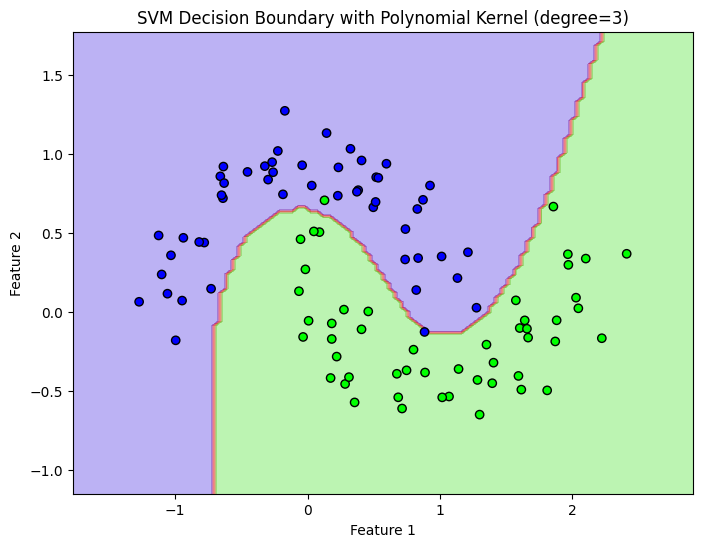

In [4]:
# 24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# 1. Generate a non-linear 2D dataset
# make_moons creates two interleaving half-circles, perfect for testing non-linear kernels
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# 2. Initialize and train the SVM with a Polynomial Kernel
# degree=3 creates a cubic polynomial boundary.
# coef0=1 controls how much the model is influenced by high-degree vs low-degree polynomials.
svm_poly = SVC(kernel='poly', degree=3, coef0=1.0, C=5.0)
svm_poly.fit(X, y)

# 3. Create a meshgrid to plot the decision boundary
# We create a grid of points covering the range of our dataset
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 4. Predict the classification for every point in the meshgrid
# np.c_ stacks the grid coordinates to match the feature shape the model expects
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Visualize the results
plt.figure(figsize=(8, 6))

# Plot the contour line (decision boundary)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.brg)

# Plot the original data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.brg)

plt.title("SVM Decision Boundary with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# 25: Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data   # Features (e.g., mean radius, texture, perimeter, area)
y = cancer_data.target # Target labels (0 = Malignant, 1 = Benign)

# 2. Split the dataset into training and testing sets
# We use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the Gaussian Naive Bayes Classifier
# This model assumes that the continuous features follow a normal (Gaussian) distribution
gnb_classifier = GaussianNB()

# 4. Train the model using the training data
gnb_classifier.fit(X_train, y_train)

# 5. Make predictions on the unseen test set
y_pred = gnb_classifier.predict(X_test)

# 6. Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.37%


In [6]:
# 26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the 20 Newsgroups dataset
# To keep the execution fast, we will select just 4 categories out of the 20 available.
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# Fetch training and testing data
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# 2. Convert raw text into numerical feature vectors
# MultinomialNB requires word counts or frequencies. We use TF-IDF to penalize
# extremely common words (like 'the', 'and') and highlight unique, informative words.
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_data.data)
X_test_tfidf = vectorizer.transform(test_data.data)

# 3. Initialize the Multinomial Naive Bayes Classifier
# The 'alpha' parameter acts as Laplace smoothing to handle words present in the
# test data that were never seen in the training data.
mnb_classifier = MultinomialNB(alpha=1.0)

# 4. Train the model using the vectorized training data
mnb_classifier.fit(X_train_tfidf, train_data.target)

# 5. Make predictions on the unseen test set
y_pred = mnb_classifier.predict(X_test_tfidf)

# 6. Evaluate the accuracy and print a detailed report
accuracy = accuracy_score(test_data.target, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(test_data.target, y_pred, target_names=train_data.target_names))

Model Accuracy: 83.49%

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



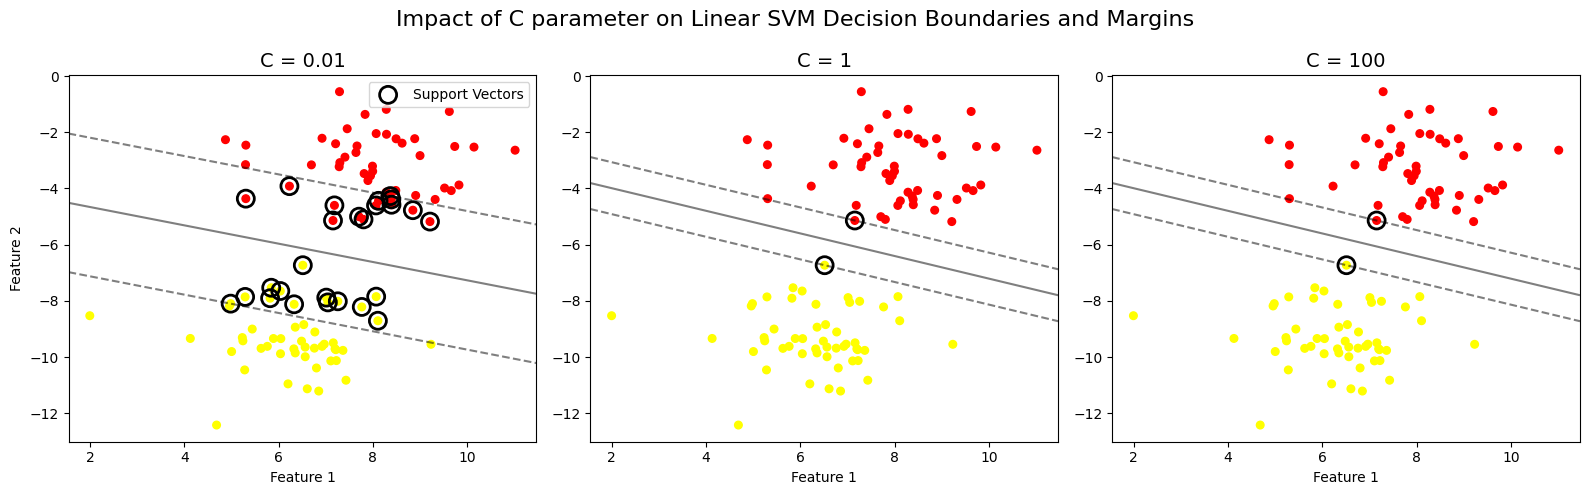

In [7]:
# 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# --- 1. Data Generation ---
# Generate a 2D linearly separable dataset with some slight noise.
# We use 2 centers for binary classification.
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.2)

# --- 2. Define C values to compare ---
# We choose values spanning several orders of magnitude to see distinct effects.
C_values = [0.01, 1, 100]

# --- 3. Visualization Setup ---
# Create subplots arranged in a row
fig, axes = plt.subplots(1, len(C_values), figsize=(16, 5))
fig.suptitle('Impact of C parameter on Linear SVM Decision Boundaries and Margins', fontsize=16)

def plot_svc_decision_function(model, ax=None):
    """Helper function to plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()

    # Get the range of the data to create a grid
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X_grid = np.meshgrid(y, x)
    xy = np.vstack([X_grid.ravel(), Y.ravel()]).T

    # Get the decision function values (distance from the boundary)
    P = model.decision_function(xy).reshape(X_grid.shape)

    # Plot decision boundary and margins
    # Level 0 is the solid decision boundary.
    # Levels -1 and +1 are the dashed margins.
    ax.contour(X_grid, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

# --- 4. Training and Plotting Loop ---
for i, C in enumerate(C_values):
    ax = axes[i]

    # Initialize SVM Classifier with Linear Kernel and current C value
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Plot the training data points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='autumn')

    # Plot the decision boundary and margins
    plot_svc_decision_function(clf, ax)

    # Highlight the Support Vectors
    # These are the crucial points that define the boundary positions
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=150, linewidth=2, facecolors='none', edgecolors='k', label='Support Vectors')

    ax.set_title(f'C = {C}', fontsize=14)
    ax.set_xlabel('Feature 1')
    if i == 0:
        ax.set_ylabel('Feature 2')
        ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.85) # Adjust space for main title
plt.show()

In [8]:
# 28.  Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Generate a synthetic dataset with binary features
# Let's create 500 samples, each with 10 binary features (0 or 1).
num_samples = 500
num_features = 10

# Generate random 0s and 1s for the feature matrix X
X = np.random.randint(2, size=(num_samples, num_features))

# Generate random binary target labels y (0 or 1)
# To make it slightly realistic, let's make the label depend loosely on the first feature
y = (X[:, 0] & X[:, 1]) | np.random.randint(2, size=(num_samples,))

# 2. Split the dataset into training and testing sets
# We use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the Bernoulli Naive Bayes Classifier
# The 'alpha' parameter is for Laplace smoothing (prevents zero probabilities)
# 'binarize=None' because our data is already strictly binary (0s and 1s)
bernoulli_nb = BernoulliNB(alpha=1.0, binarize=None)

# 4. Train the model using the training data
bernoulli_nb.fit(X_train, y_train)

# 5. Make predictions on the unseen test set
y_pred = bernoulli_nb.predict(X_test)

# 6. Evaluate the accuracy and print the results
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 61.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.24      0.29        33
           1       0.68      0.79      0.73        67

    accuracy                           0.61       100
   macro avg       0.52      0.52      0.51       100
weighted avg       0.58      0.61      0.59       100



In [9]:
# 29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Generate a synthetic dataset
# We create 1000 samples with 5 equally important features
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5,
                           n_redundant=0, random_state=42)

# Artificially inflate the scale of the first feature by multiplying it by 100,000.
# This simulates raw, unscaled real-world data where one metric dwarfs the others.
X[:, 0] = X[:, 0] * 100000

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Train and Evaluate on UNSCALED Data ---
print("Training SVM on UNSCALED data...")
start_time = time.time()
# The RBF kernel is especially sensitive to unscaled distances
svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)
unscaled_time = time.time() - start_time

y_pred_unscaled = svm_unscaled.predict(X_test)
unscaled_accuracy = accuracy_score(y_test, y_pred_unscaled)

# --- 4. Apply Feature Scaling ---
# StandardScaler transforms data so each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
# We fit the scaler ONLY on the training data to prevent data leakage, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5. Train and Evaluate on SCALED Data ---
print("Training SVM on SCALED data...")
start_time = time.time()
svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
scaled_time = time.time() - start_time

y_pred_scaled = svm_scaled.predict(X_test_scaled)
scaled_accuracy = accuracy_score(y_test, y_pred_scaled)

# --- 6. Compare the Results ---
print("\n--- Results Comparison ---")
print(f"Unscaled Data -> Accuracy: {unscaled_accuracy * 100:.2f}% | Training Time: {unscaled_time:.4f} seconds")
print(f"Scaled Data   -> Accuracy: {scaled_accuracy * 100:.2f}% | Training Time: {scaled_time:.4f} seconds")

Training SVM on UNSCALED data...
Training SVM on SCALED data...

--- Results Comparison ---
Unscaled Data -> Accuracy: 63.33% | Training Time: 0.1457 seconds
Scaled Data   -> Accuracy: 94.67% | Training Time: 0.0116 seconds


In [10]:
# 30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Generate a synthetic dataset
# We create 500 samples with 4 features. We add some noise to make classification harder.
X, y = make_classification(n_samples=500, n_features=4, n_informative=4,
                           n_redundant=0, class_sep=0.5, random_state=42)

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train Model 1: Minimal Variance Smoothing (Mimicking "No Smoothing")
# The default var_smoothing in sklearn is 1e-9.
# We set it to an extremely low value (1e-15) to simulate an unsmoothed state.
gnb_unsmoothed = GaussianNB(var_smoothing=1e-15)
gnb_unsmoothed.fit(X_train, y_train)

# 4. Train Model 2: Heavy Variance Smoothing
# We increase the smoothing significantly to 0.1 to see how it impacts predictions.
gnb_smoothed = GaussianNB(var_smoothing=0.1)
gnb_smoothed.fit(X_train, y_train)

# 5. Make predictions on the unseen test set
y_pred_unsmoothed = gnb_unsmoothed.predict(X_test)
y_pred_smoothed = gnb_smoothed.predict(X_test)

# 6. Evaluate and compare accuracies
acc_unsmoothed = accuracy_score(y_test, y_pred_unsmoothed)
acc_smoothed = accuracy_score(y_test, y_pred_smoothed)

print("--- Gaussian Naive Bayes Smoothing Comparison ---")
print(f"Accuracy with Minimal Smoothing (1e-15): {acc_unsmoothed * 100:.2f}%")
print(f"Accuracy with Heavy Smoothing (0.1):     {acc_smoothed * 100:.2f}%")

# 7. Show a direct prediction comparison for the first 15 test samples
print("\nPrediction comparison for the first 15 samples:")
print(f"Actual Labels:      {y_test[:15]}")
print(f"Unsmoothed Preds:   {y_pred_unsmoothed[:15]}")
print(f"Smoothed Preds:     {y_pred_smoothed[:15]}")

--- Gaussian Naive Bayes Smoothing Comparison ---
Accuracy with Minimal Smoothing (1e-15): 71.33%
Accuracy with Heavy Smoothing (0.1):     71.33%

Prediction comparison for the first 15 samples:
Actual Labels:      [1 0 0 1 1 0 0 1 0 0 0 1 1 1 1]
Unsmoothed Preds:   [1 1 0 0 1 0 0 1 0 1 0 0 1 0 1]
Smoothed Preds:     [1 1 0 0 1 0 0 1 0 1 0 0 1 0 1]


In [11]:
# 31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,gamma, kernel)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the dataset
# We'll use the Breast Cancer dataset for this tuning example
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the features
# Crucial for SVMs, especially when tuning C and gamma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define the parameter grid
# GridSearchCV will test every single combination of these values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# 5. Initialize the SVM classifier and GridSearchCV
svm = SVC(random_state=42)

# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores to speed up the process
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# 6. Fit the grid search to the scaled training data
# This step takes time as it trains (4 * 4 * 2) * 5 folds = 160 different models
print("Starting Grid Search...")
grid_search.fit(X_train_scaled, y_train)

# 7. Extract the best parameters and the best model
print("\n--- Grid Search Results ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")

best_svm_model = grid_search.best_estimator_

# 8. Evaluate the best model on the unseen test set
y_pred = best_svm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Set Accuracy (using best model): {test_accuracy * 100:.2f}%\n")
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred))

Starting Grid Search...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

--- Grid Search Results ---
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 97.48%

Test Set Accuracy (using best model): 98.25%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [12]:
# 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Generate an explicitly imbalanced dataset
# 1000 samples, where 95% belong to Class 0 and 5% belong to Class 1
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5,
                           weights=[0.95], random_state=42)

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Train Standard SVM (No Weights) ---
print("Training Standard SVM...")
svm_standard = SVC(kernel='linear', random_state=42)
svm_standard.fit(X_train, y_train)
y_pred_standard = svm_standard.predict(X_test)

# --- 4. Train Weighted SVM (class_weight='balanced') ---
print("Training Weighted SVM...")
# The 'balanced' parameter automatically adjusts weights inversely proportional to class frequencies
svm_weighted = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

# --- 5. Compare Accuracy ---
acc_standard = accuracy_score(y_test, y_pred_standard)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print("\n--- Accuracy Comparison ---")
print(f"Standard SVM Accuracy: {acc_standard * 100:.2f}%")
print(f"Weighted SVM Accuracy: {acc_weighted * 100:.2f}%")

# --- 6. Compare the Real Impact (Recall & Precision) ---
print("\n--- Standard SVM Classification Report ---")
print(classification_report(y_test, y_pred_standard, zero_division=0))

print("\n--- Weighted SVM Classification Report ---")
print(classification_report(y_test, y_pred_weighted))

Training Standard SVM...
Training Weighted SVM...

--- Accuracy Comparison ---
Standard SVM Accuracy: 93.33%
Weighted SVM Accuracy: 76.00%

--- Standard SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       277
           1       1.00      0.13      0.23        23

    accuracy                           0.93       300
   macro avg       0.97      0.57      0.60       300
weighted avg       0.94      0.93      0.91       300


--- Weighted SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.77      0.85       277
           1       0.20      0.70      0.31        23

    accuracy                           0.76       300
   macro avg       0.58      0.73      0.58       300
weighted avg       0.91      0.76      0.81       300



In [14]:
# 33.  Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a sample email dataset
# 'ham' means a normal, non-spam email. 'spam' means junk/promotional email.
data = {
    'text': [
        "Hey, are we still on for the meeting at 3 PM?",
        "CONGRATULATIONS! You have won a $1000 Walmart gift card. Click here to claim.",
        "Can you please review the attached project report by tomorrow?",
        "URGENT: Your bank account has been compromised. Update your password immediately.",
        "Let's grab lunch later this week.",
        "Limited time offer! Get 50% off all electronics. Buy now!",
        "Don't forget to pick up groceries on your way home.",
        "Earn $5000 a week working from home! No experience needed."
    ],
    'label': ['ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam']
}

df = pd.DataFrame(data)

# 2. Convert text labels to numerical values (0 for ham, 1 for spam)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_num'], test_size=0.25, random_state=42
)

# 4. Convert the email text into numerical feature vectors
# CountVectorizer builds a vocabulary of all words and counts their occurrences (Bag of Words)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 5. Initialize and train the Multinomial Naive Bayes Classifier
# MultinomialNB is the industry standard for text classification based on word counts
spam_classifier = MultinomialNB()
spam_classifier.fit(X_train_vectorized, y_train)

# 6. Make predictions on the test set
y_pred = spam_classifier.predict(X_test_vectorized)

# 7. Evaluate the model
print("--- Spam Detection Model Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")
print("Classification Report:")
# target_names maps the 0/1 back to 'ham'/'spam' for readability in the report
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# --- 8. Test the model with your own custom emails ---
def predict_email(email_text):
    # Vectorize the new email using the SAME vectorizer fitted on the training data
    email_vectorized = vectorizer.transform([email_text])
    prediction = spam_classifier.predict(email_vectorized)
    return "SPAM" if prediction[0] == 1 else "HAM (Normal)"

print("\n--- Testing Custom Emails ---")
test_email_1 = "Hi John, the code looks good. Please merge the pull request."
test_email_2 = "WINNER! You've been selected for a free iPhone 15. Click the link!"

print(f"Email 1: '{test_email_1}' -> Predicted: {predict_email(test_email_1)}")
print(f"Email 2: '{test_email_2}' -> Predicted: {predict_email(test_email_2)}")

--- Spam Detection Model Results ---
Accuracy: 0.00%

Classification Report:
              precision    recall  f1-score   support

         ham       0.00      0.00      0.00       0.0
        spam       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


--- Testing Custom Emails ---
Email 1: 'Hi John, the code looks good. Please merge the pull request.' -> Predicted: HAM (Normal)
Email 2: 'WINNER! You've been selected for a free iPhone 15. Click the link!' -> Predicted: HAM (Normal)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [15]:
# 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the features
# While Naive Bayes is generally unaffected by feature scaling, SVM is highly
# sensitive to it. We scale the data so the SVM operates under optimal conditions.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize both classifiers
svm_classifier = SVC(kernel='linear', random_state=42)
nb_classifier = GaussianNB()

# 5. Train both models using the scaled training data
print("Training models...")
svm_classifier.fit(X_train_scaled, y_train)
nb_classifier.fit(X_train_scaled, y_train)

# 6. Make predictions on the unseen test set
svm_predictions = svm_classifier.predict(X_test_scaled)
nb_predictions = nb_classifier.predict(X_test_scaled)

# 7. Calculate and compare accuracies
svm_accuracy = accuracy_score(y_test, svm_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("\n--- Accuracy Comparison ---")
print(f"SVM Accuracy:         {svm_accuracy * 100:.2f}%")
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%\n")

# 8. (Optional) Deeper look into precision and recall
print("--- SVM Classification Report ---")
print(classification_report(y_test, svm_predictions, target_names=data.target_names))

print("--- Naive Bayes Classification Report ---")
print(classification_report(y_test, nb_predictions, target_names=data.target_names))

Training models...

--- Accuracy Comparison ---
SVM Accuracy:         97.66%
Naive Bayes Accuracy: 93.57%

--- SVM Classification Report ---
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

--- Naive Bayes Classification Report ---
              precision    recall  f1-score   support

   malignant       0.92      0.90      0.91        63
      benign       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [16]:
# 35.  Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# 1. Load the dataset (30 features in total)
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Train Naive Bayes using ALL features ---
nb_all = GaussianNB()
nb_all.fit(X_train, y_train)
y_pred_all = nb_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# --- 4. Perform Feature Selection ---
# We use SelectKBest to pick the top 5 most informative features
# f_classif uses the ANOVA F-value to rank the importance of features
selector = SelectKBest(score_func=f_classif, k=5)

# Fit the selector to the training data and transform both sets
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features for transparency
selected_mask = selector.get_support()
selected_names = data.feature_names[selected_mask]

# --- 5. Train Naive Bayes using SELECTED features ---
nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

# --- 6. Results Comparison ---
print("--- Naive Bayes Feature Selection Results ---")
print(f"Accuracy with ALL 30 features:      {acc_all * 100:.2f}%")
print(f"Accuracy with TOP 5 features:       {acc_selected * 100:.2f}%")
print("\nTop 5 Selected Features:")
for name in selected_names:
    print(f"- {name}")

--- Naive Bayes Feature Selection Results ---
Accuracy with ALL 30 features:      94.15%
Accuracy with TOP 5 features:       94.74%

Top 5 Selected Features:
- mean perimeter
- mean concave points
- worst radius
- worst perimeter
- worst concave points


In [17]:
# 36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Wine dataset (3 classes)
wine = datasets.load_wine()
X, y = wine.data, wine.target

# 2. Split and Scale the data
# SVM is distance-based, so scaling is mandatory for fair comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Implement One-vs-Rest (OvR) Strategy
# Most SVM implementations use OvR by default for multi-class
ovr_strategy = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
ovr_strategy.fit(X_train_scaled, y_train)
y_pred_ovr = ovr_strategy.predict(X_test_scaled)

# 4. Implement One-vs-One (OvO) Strategy
ovo_strategy = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
ovo_strategy.fit(X_train_scaled, y_train)
y_pred_ovo = ovo_strategy.predict(X_test_scaled)

# 5. Compare Accuracies
acc_ovr = accuracy_score(y_test, y_pred_ovr)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print("--- Multi-class SVM Strategy Comparison ---")
print(f"One-vs-Rest (OvR) Accuracy: {acc_ovr * 100:.2f}%")
print(f"One-vs-One (OvO) Accuracy:  {acc_ovo * 100:.2f}%")

--- Multi-class SVM Strategy Comparison ---
One-vs-Rest (OvR) Accuracy: 98.15%
One-vs-One (OvO) Accuracy:  98.15%


In [18]:
 # 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.
 from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
# SVM calculates distances; scaling ensures all features contribute equally.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define the kernels to compare
kernels = ['linear', 'poly', 'rbf']
results = {}

# 5. Train and Evaluate each kernel
for kernel in kernels:
    # We use default hyperparameters for a fair baseline comparison
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results[kernel] = accuracy

# 6. Display Comparison
print("--- SVM Kernel Accuracy Comparison ---")
for kernel, acc in results.items():
    print(f"Kernel: {kernel:10} | Accuracy: {acc * 100:.2f}%")

--- SVM Kernel Accuracy Comparison ---
Kernel: linear     | Accuracy: 95.61%
Kernel: poly       | Accuracy: 86.84%
Kernel: rbf        | Accuracy: 98.25%


In [19]:
# 38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
# We'll use Iris for a clear demonstration of class stratification
data = load_iris()
X, y = data.data, data.target

# 2. Scale the features
# Always scale before cross-validation to ensure SVM distance calculations are accurate
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Initialize the SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# 4. Set up Stratified K-Fold
# n_splits=5 means the data is divided into 5 folds.
# Each fold will be used once as a test set while the other 4 serve as training.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Compute Cross-Validation Accuracy
# cross_val_score automates the splitting, training, and testing process
accuracies = cross_val_score(svm_model, X_scaled, y, cv=skf)

# 6. Output the results
print("--- Stratified K-Fold Results ---")
for i, acc in enumerate(accuracies, 1):
    print(f"Fold {i} Accuracy: {acc * 100:.2f}%")

print("-" * 30)
print(f"Average Accuracy: {np.mean(accuracies) * 100:.2f}%")
print(f"Standard Deviation: {np.std(accuracies) * 100:.2f}%")

--- Stratified K-Fold Results ---
Fold 1 Accuracy: 100.00%
Fold 2 Accuracy: 96.67%
Fold 3 Accuracy: 90.00%
Fold 4 Accuracy: 100.00%
Fold 5 Accuracy: 90.00%
------------------------------
Average Accuracy: 95.33%
Standard Deviation: 4.52%


In [20]:
# 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset (Iris has 3 classes: Setosa, Versicolor, Virginica)
data = load_iris()
X, y = data.data, data.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define different sets of prior probabilities
# Note: The sum of probabilities in each list must equal 1.0
priors_list = [
    None,                # Default (calculated from training data)
    [0.8, 0.1, 0.1],     # Heavily biased towards the first class (Setosa)
    [0.1, 0.1, 0.8]      # Heavily biased towards the third class (Virginica)
]

labels = ["Default (Data-driven)", "Biased towards Setosa", "Biased towards Virginica"]

print("--- Naive Bayes Prior Probability Comparison ---")

for prior, label in zip(priors_list, labels):
    # 4. Initialize and train the model with specific priors
    model = GaussianNB(priors=prior)
    model.fit(X_train, y_train)

    # 5. Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nScenario: {label}")
    print(f"Priors used: {prior if prior else 'Automatic'}")
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Showing how the bias affects predictions for specific classes
    # (Checking the count of each class predicted)
    unique, counts = np.unique(y_pred, return_counts=True)
    print(f"Class distribution in predictions: {dict(zip(data.target_names, counts))}")

--- Naive Bayes Prior Probability Comparison ---

Scenario: Default (Data-driven)
Priors used: Automatic
Accuracy: 97.78%
Class distribution in predictions: {np.str_('setosa'): np.int64(19), np.str_('versicolor'): np.int64(12), np.str_('virginica'): np.int64(14)}

Scenario: Biased towards Setosa
Priors used: [0.8, 0.1, 0.1]
Accuracy: 97.78%
Class distribution in predictions: {np.str_('setosa'): np.int64(19), np.str_('versicolor'): np.int64(12), np.str_('virginica'): np.int64(14)}

Scenario: Biased towards Virginica
Priors used: [0.1, 0.1, 0.8]
Accuracy: 88.89%
Class distribution in predictions: {np.str_('setosa'): np.int64(19), np.str_('versicolor'): np.int64(8), np.str_('virginica'): np.int64(18)}


In [21]:
# 40.  Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# 1. Load the dataset (30 features)
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split and Scale the data
# RFE uses the model's coefficients, so scaling is vital for an SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Train SVM with ALL features ---
# We use a linear kernel because RFE requires a model that provides feature importance (coef_)
svm_full = SVC(kernel='linear', random_state=42)
svm_full.fit(X_train_scaled, y_train)
y_pred_full = svm_full.predict(X_test_scaled)
acc_full = accuracy_score(y_test, y_pred_full)

# --- 4. Perform Recursive Feature Elimination (RFE) ---
# We want to select the top 10 most impactful features
svm_rfe_base = SVC(kernel='linear', random_state=42)
rfe = RFE(estimator=svm_rfe_base, n_features_to_select=10, step=1)
rfe.fit(X_train_scaled, y_train)

# Transform the datasets to include only the selected 10 features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# --- 5. Train SVM with SELECTED features ---
svm_rfe_final = SVC(kernel='linear', random_state=42)
svm_rfe_final.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe_final.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

# --- 6. Results Comparison ---
print("--- SVM Feature Selection (RFE) Results ---")
print(f"Accuracy with all 30 features: {acc_full * 100:.2f}%")
print(f"Accuracy with top 10 features: {acc_rfe * 100:.2f}%")

# Identifying which features were kept
selected_features = data.feature_names[rfe.support_]
print("\nTop 10 Features Selected by RFE:")
for feature in selected_features:
    print(f"- {feature}")

--- SVM Feature Selection (RFE) Results ---
Accuracy with all 30 features: 97.66%
Accuracy with top 10 features: 96.49%

Top 10 Features Selected by RFE:
- mean compactness
- mean concave points
- area error
- concave points error
- symmetry error
- fractal dimension error
- worst texture
- worst area
- worst concavity
- worst symmetry


In [22]:
# 41.  Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split and Scale
# Scaling is essential for SVM to calculate margins correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train the SVM Classifier
# Using RBF kernel with default C=1.0
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 4. Make Predictions
y_pred = svm_model.predict(X_test_scaled)

# 5. Evaluate Performance using Precision, Recall, and F1-Score
# Since breast cancer classification is binary, we calculate these directly
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("--- SVM Performance Metrics ---")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# 6. Detailed Classification Report
# This provides metrics for BOTH classes (Malignant and Benign)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

--- SVM Performance Metrics ---
Precision: 0.9815
Recall:    0.9815
F1-Score:  0.9815

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [23]:
# 42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, accuracy_score

# 1. Load the dataset
# Iris has 3 classes, making it a good candidate for multi-class log loss
data = load_iris()
X, y = data.data, data.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 4. Predict Class Probabilities
# Log Loss requires probabilities (0.0 to 1.0) rather than hard labels (0, 1, 2)
# predict_proba returns a matrix where each row is [Prob_Class_0, Prob_Class_1, Prob_Class_2]
y_probs = gnb.predict_proba(X_test)

# 5. Predict hard labels for accuracy comparison
y_pred = gnb.predict(X_test)

# 6. Calculate Log Loss and Accuracy
loss = log_loss(y_test, y_probs)
acc = accuracy_score(y_test, y_pred)

print("--- Naive Bayes Evaluation ---")
print(f"Accuracy: {acc * 100:.2f}%")
print(f"Log Loss: {loss:.4f}")

# --- 7. Demonstration of Probabilities ---
print("\nFirst 5 Test Samples (Probabilities):")
for i in range(5):
    print(f"Actual: {y_test[i]} | Predicted Probs: {y_probs[i].round(4)}")

--- Naive Bayes Evaluation ---
Accuracy: 97.78%
Log Loss: 0.0490

First 5 Test Samples (Probabilities):
Actual: 1 | Predicted Probs: [0.     0.9955 0.0045]
Actual: 0 | Predicted Probs: [1. 0. 0.]
Actual: 2 | Predicted Probs: [0. 0. 1.]
Actual: 1 | Predicted Probs: [0.     0.9749 0.0251]
Actual: 1 | Predicted Probs: [0.     0.8319 0.1681]


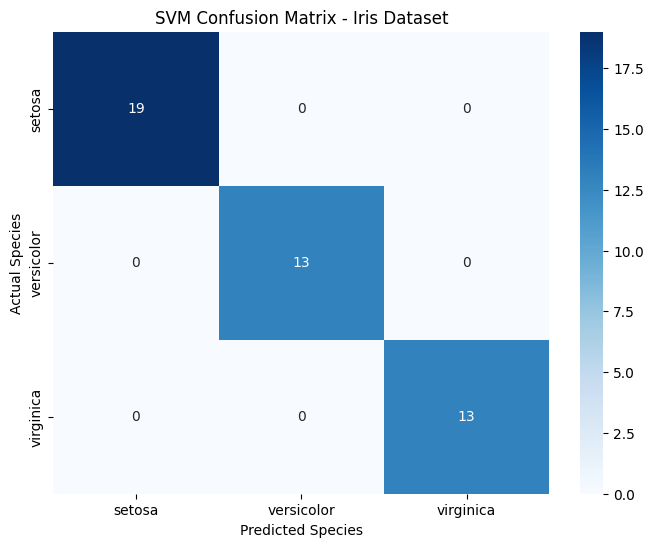

In [24]:
# 43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
# Iris has 3 classes, making the confusion matrix a 3x3 grid
data = load_iris()
X, y = data.data, data.target

# 2. Split and Scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train the SVM Classifier
# Using an RBF kernel for robust classification
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 4. Make Predictions
y_pred = svm_model.predict(X_test_scaled)

# 5. Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Visualize the Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.title('SVM Confusion Matrix - Iris Dataset')
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.show()

In [25]:
# 44.  Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
# SVR relies on distance; scaling is mandatory for it to function correctly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize and train the Support Vector Regressor (SVR)
# RBF kernel is the default and usually best for non-linear housing data
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# 5. Make Predictions
y_pred = svr_model.predict(X_test_scaled)

# 6. Evaluate using MAE and compare with MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("--- SVR Regression Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")

# Example of interpretation
print(f"\nInterpretation: On average, the model's prediction is off by {mae:.2f} units.")

--- SVR Regression Performance ---
Mean Absolute Error (MAE): 0.3986
Mean Squared Error (MSE):  0.3570

Interpretation: On average, the model's prediction is off by 0.40 units.


--- Naive Bayes Performance ---
ROC-AUC Score: 0.9922


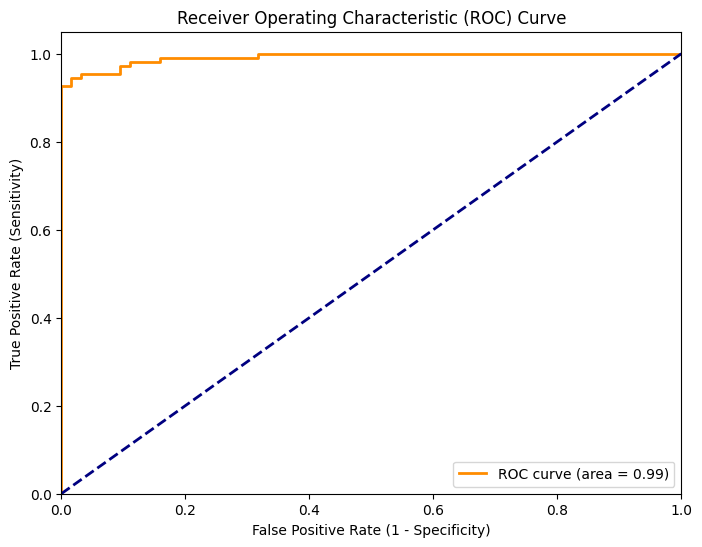

In [26]:
# 45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Load the dataset
# Breast Cancer is a binary classification dataset (Malignant vs Benign)
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 4. Predict probabilities
# ROC-AUC requires probabilities, not just hard labels (0 or 1)
# we take the probabilities for the positive class (column 1)
y_probs = gnb.predict_proba(X_test)[:, 1]

# 5. Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"--- Naive Bayes Performance ---")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 6. Plotting the ROC Curve for visualization
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

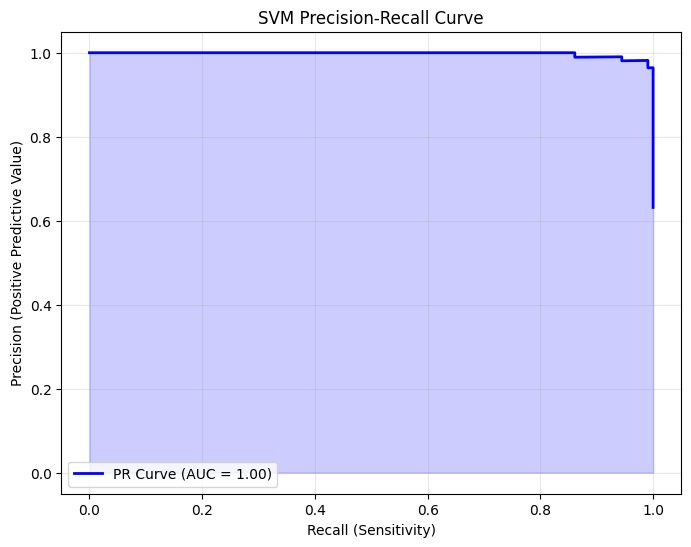

Average Precision Score: 0.9980


In [27]:
# 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split and Scale
# SVMs are distance-based; scaling is mandatory for correct performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train the SVM Classifier
# We use probability=True so the model can output confidence scores for the curve
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 4. Get predicted probabilities for the positive class
y_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

# 5. Calculate Precision and Recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# 6. Calculate Area Under Curve (AUC) and Average Precision (AP)
pr_auc = auc(recall, precision)
ap_score = average_precision_score(y_test, y_probs)

# 7. Visualize the Precision-Recall Curve

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.fill_between(recall, precision, alpha=0.2, color='blue')

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('SVM Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

print(f"Average Precision Score: {ap_score:.4f}")